In [1]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('data_7.txt')

# part 1

***Exercise 1.1***

In [3]:
#Grouped by age and the column will be race
df2 = df.groupby(['age', 'race']).size().reset_index(name='Count')
df3 = df2.pivot(index='age', columns='race', values='Count').reset_index()
df3 = df3.fillna(0)

df3

race,age,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,18,2.0,0.0,1.0,0.0,0.0,0.0
1,19,22.0,0.0,9.0,2.0,0.0,1.0
2,20,109.0,1.0,44.0,12.0,1.0,16.0
3,21,191.0,1.0,76.0,31.0,1.0,18.0
4,22,187.0,1.0,83.0,24.0,1.0,9.0
...,...,...,...,...,...,...,...
60,78,0.0,0.0,1.0,0.0,0.0,0.0
61,79,0.0,0.0,1.0,0.0,0.0,0.0
62,80,0.0,0.0,1.0,0.0,0.0,0.0
63,83,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
source_df = ColumnDataSource(data=df3)

In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
df3

race,age,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,18,2.0,0.0,1.0,0.0,0.0,0.0
1,19,22.0,0.0,9.0,2.0,0.0,1.0
2,20,109.0,1.0,44.0,12.0,1.0,16.0
3,21,191.0,1.0,76.0,31.0,1.0,18.0
4,22,187.0,1.0,83.0,24.0,1.0,9.0
...,...,...,...,...,...,...,...
60,78,0.0,0.0,1.0,0.0,0.0,0.0
61,79,0.0,0.0,1.0,0.0,0.0,0.0
62,80,0.0,0.0,1.0,0.0,0.0,0.0
63,83,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
races = list(df3.columns[1:])
races

['African-American',
 'Asian',
 'Caucasian',
 'Hispanic',
 'Native American',
 'Other']

In [8]:

p = figure(height=250, title="Recid Counts", toolbar_location=None)

In [9]:


bar ={} # to store vbars 
  # here we will do a for loop to create a bar for each race
for indx,i in enumerate(races):
    bar[i] = p.vbar(x='age',top=i, source= source_df, width=0.5)


In [10]:

p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide')
show(p) #displays your plot

C:\Users\Jennifer\Anaconda3\lib\site-packages\bokeh\models\plots.py:756: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


***Exercise 1.2***

In [11]:
data = df

In [12]:
print(data)

         id compas_screening_date     sex  age          age_cat  \
0         1            2013-08-14    Male   69  Greater than 45   
1         3            2013-01-27    Male   34          25 - 45   
2         4            2013-04-14    Male   24     Less than 25   
3         5            2013-01-13    Male   23     Less than 25   
4         6            2013-03-26    Male   43          25 - 45   
...     ...                   ...     ...  ...              ...   
7209  10996            2013-11-23    Male   23     Less than 25   
7210  10997            2014-02-01    Male   23     Less than 25   
7211  10999            2014-01-14    Male   57  Greater than 45   
7212  11000            2014-03-09  Female   33          25 - 45   
7213  11001            2014-06-30  Female   23     Less than 25   

                  race  juv_fel_count  decile_score  juv_misd_count  \
0                Other              0             1               0   
1     African-American              0             3  

In [13]:
race_grouped_data = data.groupby(['race']).size().reset_index(name="n_samples")
data_recid = data[data['two_year_recid'] == 1]
race_grouped_data_recid = data_recid.groupby(['race']).size().reset_index(name="n_rec_crimes")
ratio_race_grouped_data_recid = race_grouped_data.merge(race_grouped_data_recid, how='inner', left_index=False, right_index=False)
ratio_race_grouped_data_recid['frac_crimes'] = ratio_race_grouped_data_recid['n_rec_crimes']/ratio_race_grouped_data_recid['n_samples']

print(ratio_race_grouped_data_recid)

               race  n_samples  n_rec_crimes  frac_crimes
0  African-American       3696          1901     0.514340
1             Asian         32             9     0.281250
2         Caucasian       2454           966     0.393643
3          Hispanic        637           232     0.364207
4   Native American         18            10     0.555556
5             Other        377           133     0.352785


In [14]:
source_df = ColumnDataSource(data=ratio_race_grouped_data_recid)

ToolTips = [
    ("index", "$index"),
    ("y", "$y"),
    ("race", "@race"),
    ("recommit crimes", "@n_rec_crimes"),
    ("samples", "@n_samples"),
    ("ratio of recommit crimes over samples", "@frac_crimes")
]

#output_file("toolbar.html")

# create a new plot with the toolbar below
p = figure(width=400, height=400, tooltips=ToolTips, x_axis_label='Different races', y_axis_label='Ratio of N_recommit_crimes over N_samples',
           title=None, toolbar_location="right")

p.circle(x='index', y='frac_crimes', color="olive", fill_alpha=1, size=20, source= source_df)


show(p)

# Part 2 

***Exercise 2***

In [15]:
df_new = df.loc[:, ['sex', 'age', 'race', 'two_year_recid']]

df_oneHotEncoding = pd.get_dummies(df_new)
df_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
print(df_oneHotEncoding)

      age  two_year_recid  sex_Female  sex_Male  race_African-American  \
0      69               0           0         1                      0   
1      34               1           0         1                      1   
2      24               1           0         1                      1   
3      23               0           0         1                      1   
4      43               0           0         1                      0   
...   ...             ...         ...       ...                    ...   
7209   23               0           0         1                      1   
7210   23               0           0         1                      1   
7211   57               0           0         1                      0   
7212   33               0           1         0                      1   
7213   23               1           1         0                      0   

      race_Asian  race_Caucasian  race_Hispanic  race_Native American  \
0              0               0      

In [16]:
# Labels that we want to predict
labels = np.array(df_oneHotEncoding['two_year_recid'])

df_oneHotEncoding_x = df_oneHotEncoding.drop('two_year_recid', axis=1)

df_oneHotEncoding_x_list = list(df_oneHotEncoding_x.columns)
df_oneHotEncoding_x = np.array(df_oneHotEncoding_x)

x_train, x_test, y_train, y_test = train_test_split(df_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (5049, 9)
Training Labels Shape: (5049,)
Testing Features Shape: (2165, 9)
Testing Labels Shape: (2165,)


In [17]:
forest = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit = forest.fit(x_train , y_train)
y_test_predicted = forest.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Classification Report: \n")
print(classification_report(y_test, y_test_predicted))

Accurancy: 0.581986143187067

Confusion Metrix: 
[[712 495]
 [410 548]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1207
           1       0.53      0.57      0.55       958

    accuracy                           0.58      2165
   macro avg       0.58      0.58      0.58      2165
weighted avg       0.59      0.58      0.58      2165



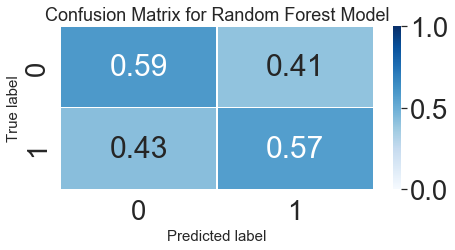

In [35]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_test_predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
p=plt.figure(figsize=(7,3))
#sns.set(font_scale=2.5)
annot_kws = {"ha": 'center',"va": 'center'}
p=sns.heatmap(matrix, annot=True, cmap='Blues', linewidths=0.2, vmin=0.0, vmax=1.0)
p.set_ylim(2, 0)

# Add labels to the plot
class_names = ['Not recid', 'Recid']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
#plt.xticks(tick_marks, class_names, rotation=0)
#plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label', fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.title('Confusion Matrix for Random Forest Model', fontsize=18)
plt.show()

In [19]:
df_caucasian = df_new[df_new['race'] == 'Caucasian']
df_caucasian_oneHotEncoding = pd.get_dummies(df_caucasian)
df_caucasian_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
df_caucasian_oneHotEncoding.drop(columns=['race_Caucasian'], inplace=True)
print(df_caucasian_oneHotEncoding)

      age  two_year_recid  sex_Female  sex_Male
6      41               1           0         1
8      39               0           1         0
9      21               1           0         1
10     27               0           0         1
12     37               0           1         0
...   ...             ...         ...       ...
7192   32               0           0         1
7194   30               1           1         0
7199   23               0           0         1
7205   23               1           0         1
7206   21               1           0         1

[2454 rows x 4 columns]


In [20]:
# Labels that we want to predict
labels = np.array(df_caucasian_oneHotEncoding['two_year_recid'])

df_caucasian_oneHotEncoding_x = df_caucasian_oneHotEncoding.drop('two_year_recid', axis=1)

df_caucasian_oneHotEncoding_x_list = list(df_caucasian_oneHotEncoding_x.columns)
df_caucasian_oneHotEncoding_x = np.array(df_caucasian_oneHotEncoding_x)

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_caucasian_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train_c.shape)
print('Training Labels Shape:', y_train_c.shape)
print('Testing Features Shape:', x_test_c.shape)
print('Testing Labels Shape:', y_test_c.shape)

Training Features Shape: (1717, 3)
Training Labels Shape: (1717,)
Testing Features Shape: (737, 3)
Testing Labels Shape: (737,)


In [21]:
forest_c = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit_c = forest_c.fit(x_train_c , y_train_c)
y_test_predicted_c = forest_c.predict(x_test_c)

accuracy = metrics.accuracy_score(y_test_c, y_test_predicted_c)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
print(confusion_matrix(y_test_c, y_test_predicted_c))
print()

print("Classification Report: \n")
print(classification_report(y_test_c, y_test_predicted_c))

Accurancy: 0.5753052917232022

Confusion Metrix: 
[[357  76]
 [237  67]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.60      0.82      0.70       433
           1       0.47      0.22      0.30       304

    accuracy                           0.58       737
   macro avg       0.53      0.52      0.50       737
weighted avg       0.55      0.58      0.53       737



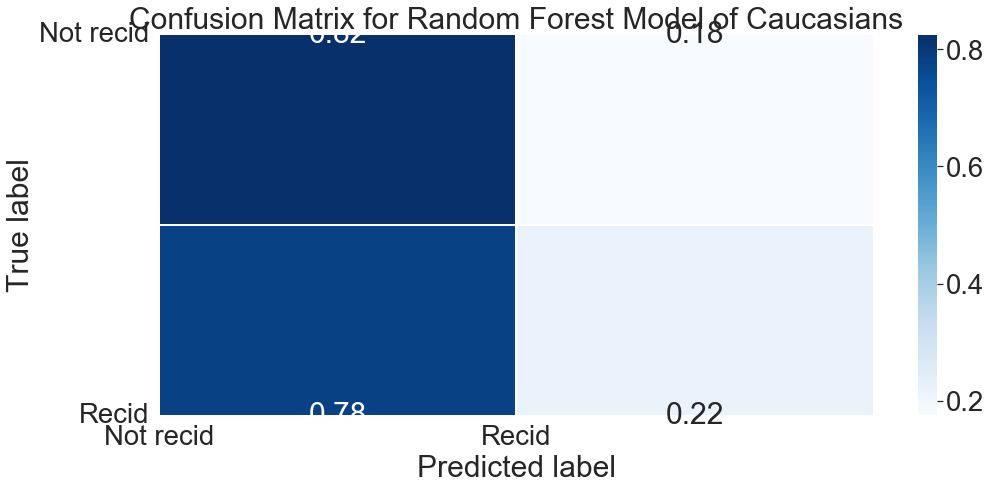

In [38]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_c, y_test_predicted_c)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
p = plt.figure(figsize=(16,7))
#sns.set(font_scale=2.5)
annot_kws = {"ha": 'center',"va": 'center'}
p = sns.heatmap(matrix, annot=True, cmap='Blues', linewidths=0.2)
p.set_ylim(2, 0)

# Add labels to the plot
class_names = ['Not recid', 'Recid']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model of Caucasians')
plt.show()

In [23]:
df_african_american = df_new[df_new['race'] == 'African-American']
df_african_american_oneHotEncoding = pd.get_dummies(df_african_american)
df_african_american_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
df_african_american_oneHotEncoding.drop(columns=['race_African-American'], inplace=True)
print(df_african_american_oneHotEncoding)

      age  two_year_recid  sex_Female  sex_Male
1      34               1           0         1
2      24               1           0         1
3      23               0           0         1
11     23               1           0         1
13     41               0           0         1
...   ...             ...         ...       ...
7207   30               1           0         1
7208   20               0           0         1
7209   23               0           0         1
7210   23               0           0         1
7212   33               0           1         0

[3696 rows x 4 columns]


In [24]:
# Labels that we want to predict
labels = np.array(df_african_american_oneHotEncoding['two_year_recid'])

df_african_american_oneHotEncoding_x = df_african_american_oneHotEncoding.drop('two_year_recid', axis=1)

df_african_american_oneHotEncoding_x_list = list(df_african_american_oneHotEncoding_x.columns)
df_african_american_oneHotEncoding_x = np.array(df_african_american_oneHotEncoding_x)

x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(df_african_american_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train_a.shape)
print('Training Labels Shape:', y_train_a.shape)
print('Testing Features Shape:', x_test_a.shape)
print('Testing Labels Shape:', y_test_a.shape)

Training Features Shape: (2587, 3)
Training Labels Shape: (2587,)
Testing Features Shape: (1109, 3)
Testing Labels Shape: (1109,)


In [25]:
forest = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit = forest.fit(x_train_a , y_train_a)
y_test_predicted_a = forest.predict(x_test_a)

accuracy = metrics.accuracy_score(y_test_a, y_test_predicted_a)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
print(confusion_matrix(y_test_a, y_test_predicted_a))
print()

print("Classification Report: \n")
print(classification_report(y_test_a, y_test_predicted_a))

Accurancy: 0.5608656447249775

Confusion Metrix: 
[[228 322]
 [165 394]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.58      0.41      0.48       550
           1       0.55      0.70      0.62       559

    accuracy                           0.56      1109
   macro avg       0.57      0.56      0.55      1109
weighted avg       0.57      0.56      0.55      1109



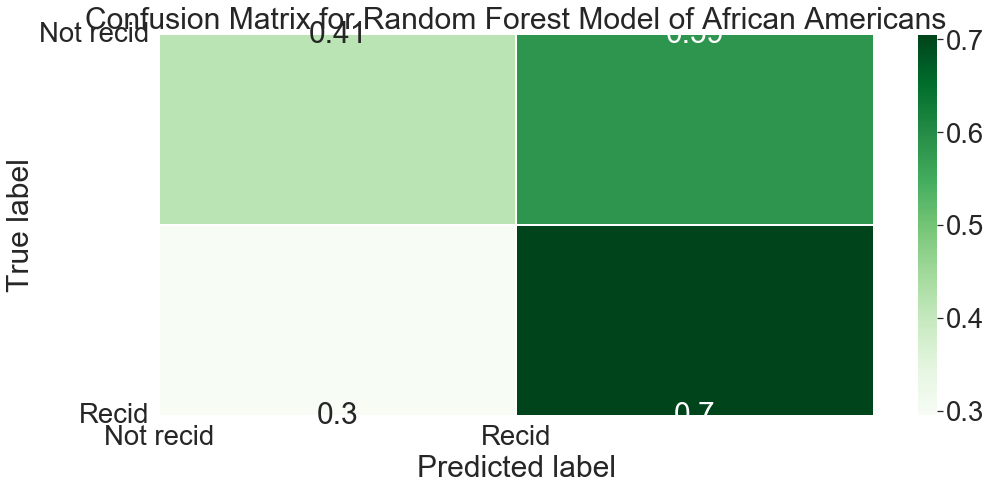

In [43]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_a, y_test_predicted_a)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
p = plt.figure(figsize=(16,7))
sns.set(font_scale=2.5)
annot_kws = {"ha": 'center',"va": 'center'}
p = sns.heatmap(matrix, annot=True, cmap=plt.cm.Greens, linewidths=0.2)
p.set_ylim(2, 0)

# Add labels to the plot
class_names = ['Not recid', 'Recid']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model of African Americans')
plt.show()

# Part 3

***Exercise 3.2***

In [27]:
p_c = y_test_predicted_c.sum()/y_test_predicted_c.size
p_aa = y_test_predicted_a.sum()/y_test_predicted_a.size
print("Predicted Caucasians, Pca: " + str(p_c))
print("Predicted African-Americans, Paa: " + str(p_aa))

Predicted Caucasians, Pca: 0.19402985074626866
Predicted African-Americans, Paa: 0.6456266907123535


In [28]:
th = 1 - (p_c/p_aa)
print(th)

0.6994705244726089
